<center>
    
# Project Submission (Code)

# Aaron Sanders, Drew Kearny, Matt Anderson

# STAT 654-600

# Team 12

</center>

In [12]:
# Runs these to load the necessary packages used for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from scipy.stats import probplot
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### The following cell is for loading in the NBA data we used to contruct and test our model 

In [13]:
# Change to directory where the data csv files are stored
os.chdir(r"C:\Users\kearn\STAT654")

## THIS IS FOR LOADING THE DATA
def read_and_process_seasons(seasons, file_path_pattern, columns_to_rename=None, combine=True):
    """
    Reads and processes Basketball Reference CSV files for multiple seasons.

    Parameters:
    - seasons (list): List of seasons (e.g., ['2019-20', '2020-21']).
    - file_path_pattern (str): Pattern for file names, e.g., '{season}_advancedstats.csv'.
    - columns_to_rename (dict, optional): Columns to rename for clarity.
    - combine (bool, optional): Combine all seasons into one DataFrame (default: True).

    Returns:
    - DataFrame: Processed data with win percentage calculated.
    """
    all_data = []

    for season in seasons:
        # Format the file path (e.g., '2019_20_advancedstats.csv')
        file_path = file_path_pattern.format(season=season.replace("-", "_"))
        
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Clean 'Team' column by removing asterisks (playoff indicators)
            df['Team'] = df['Team'].str.replace('*', '', regex=False)
            
            # Add 'season' column
            df['season'] = season
            
            # Rename columns if specified
            if columns_to_rename:
                df = df.rename(columns=columns_to_rename)
            
            # Calculate win percentage
            if 'W' in df.columns and 'L' in df.columns:
                df['win_pct'] = df['W'] / (df['W'] + df['L'])
            else:
                print(f"Warning: 'W' or 'L' column missing in {file_path}")
                continue
            
            all_data.append(df)
        
        except FileNotFoundError:
            print(f"Error: File not found - {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    # Combine all seasons into one DataFrame
    if combine and all_data:
        return pd.concat(all_data, ignore_index=True)
    return all_data

# Define seasons and file path pattern
seasons = ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']
file_path_pattern = '{season}_advancedstats.csv'  # Adjust this to match your file names

# Rename columns for clarity (e.g., Four Factors for offense and defense)
columns_to_rename = {
    'eFG%': 'eFG_off',       # Offensive effective field goal percentage
    'TOV%': 'TOV_off',       # Offensive turnover percentage
    'ORB%': 'ORB_off',       # Offensive rebound percentage
    'FT/FGA': 'FT_FGA_off',  # Offensive free throws per field goal attempt
    'eFG%.1': 'eFG_def',     # Defensive (opponent) eFG%
    'TOV%.1': 'TOV_def',     # Defensive (opponent) TOV%
    'DRB%': 'DRB_def',       # Defensive rebound percentage
    'FT/FGA.1': 'FT_FGA_def' # Defensive (opponent) FT/FGA
}

# Process the data
data = read_and_process_seasons(seasons, file_path_pattern, columns_to_rename, combine=True)

# Handle missing data by dropping rows with NaN values
data = data.dropna()

# Adds star_ppg as a column to the dataset
star_ppg = np.array([29.5, 23.4, 27.1, 22.9, 26.1, 28.8, 19.9, 34.3, 24, 23, 19.9, 19.8, 19, 26.7, 27.4, 19.6, 22.1,
                     17.8, 30, 23.8, 21.1, 25.5, 18.1, 26.5, 30.5, 19.6, 18.2, 29.6, 20.8, 23.6, 26.4, 24.8, 25.6, 28.1, 
                     28.5, 26.4, 26.9, 25, 27.7, 24.1, 25.3, 28.8, 26.4, 32, 19.1, 21.5, 21.2, 27, 21.4, 27.4, 21.6, 31.3,
                     20.4, 25.2, 22.3, 24.8, 24.8, 24.3, 24.5, 23.7, 26.9, 26.8, 25.9, 27.4, 25.5, 21.4, 28.4, 29.9, 30.6,
                     24.6, 27.1, 22.8, 21.7, 28.4, 29.9, 20.2, 21.1, 24.3, 20.1, 27.9, 24.3, 30.3, 23.2, 19.1, 23.2, 19.2, 
                     16.3, 24.5, 17.9, 24, 30.1, 28.3, 33.1, 26.2, 31.1, 24.5, 25.1, 25, 27.8, 26, 29.4, 24.2, 24.8, 31.4, 
                     29.7, 28.9, 23.8, 26.2, 32.4, 24.6, 22.9, 25.6, 23.2, 20, 20.7, 32.2, 23.3, 22.1, 21.6, 22, 26.9, 30.1, 
                     25.9, 26.4, 28.7, 22.9, 23.7, 34.7, 27.1, 21.3, 26.4, 30.4, 26.6, 33.9, 22.6, 20.8, 26.6, 21.1, 25.7, 
                     24, 25.7, 22.5, 23.2, 21.4, 22.2, 25.1, 22.7, 22.2, 22.6, 23.9])
data['star_ppg'] = star_ppg

seasons = ['2024-2025']
file_path_pattern = '{season}_advancedstats.csv'
data_new = read_and_process_seasons(seasons, file_path_pattern, columns_to_rename, combine=True)

data_new = data_new.dropna()

star_ppg = np.array([32.7, 26.8, 24, 27.6, 22.8, 23.2, 21, 26, 29.6, 24.5, 30.4, 20.2, 26.1, 28.2, 23.9,
                     22.9, 25.9, 24.2, 24.7, 20.4, 24.3, 19.3, 26.6, 21.1, 26.3, 24, 19, 25.2, 24.6, 20.5])
data_new['star_ppg'] = star_ppg

### This code is used to construct our correlation heatmap visualization

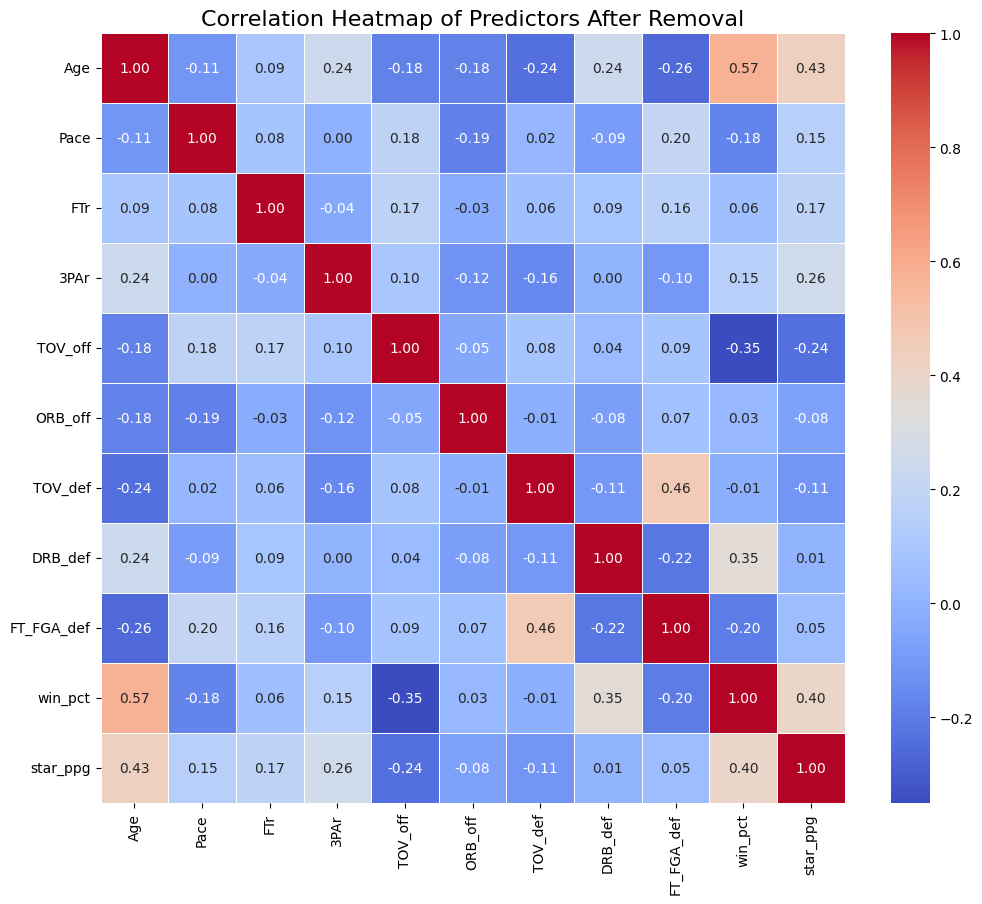

In [14]:
# Select numeric predictors and drop 'win_pct'
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=['Rk', 'W', 'L', 'PW', 'PL', 'ORtg', 'DRtg', 'NRtg', 'TS%', 'FT_FGA_off',
                                                                     'eFG_off', 'eFG_def'])

# Calculate correlations
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Predictors After Removal', fontsize=16)
plt.show()


### Scatterplots to check linearity assumptions (Some are a bit stronger than others, looking at the correlation matrix can help suggest which would be as well)

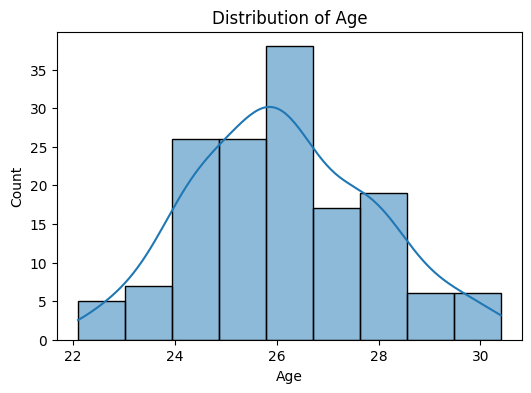

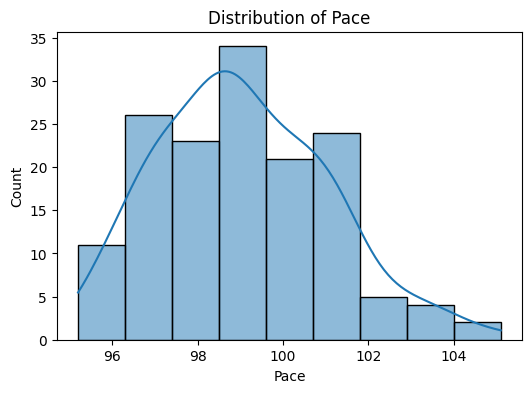

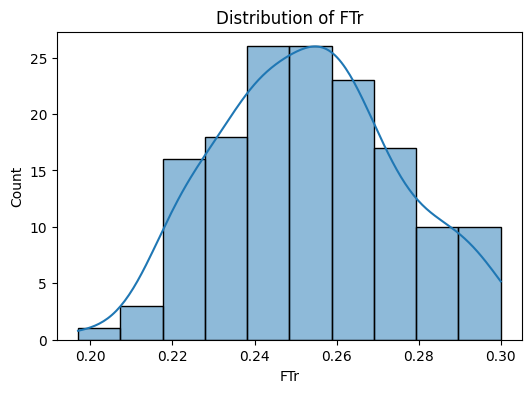

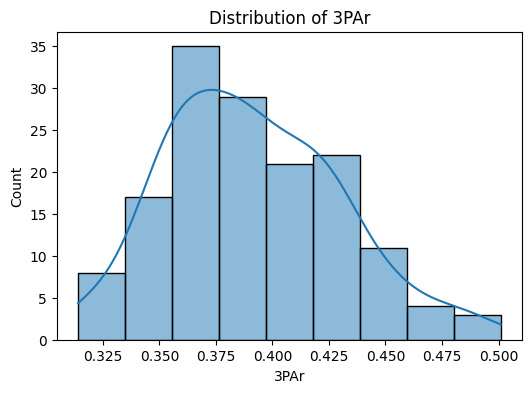

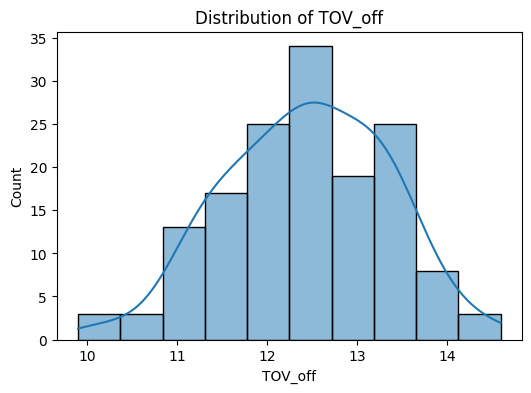

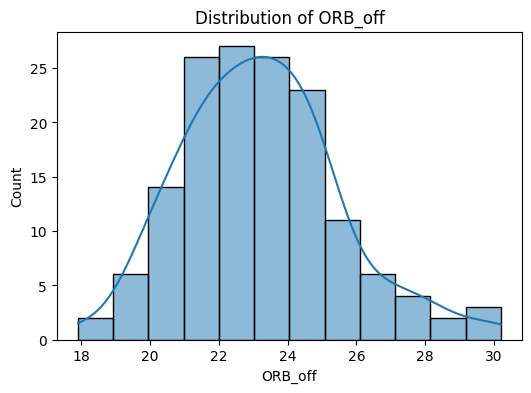

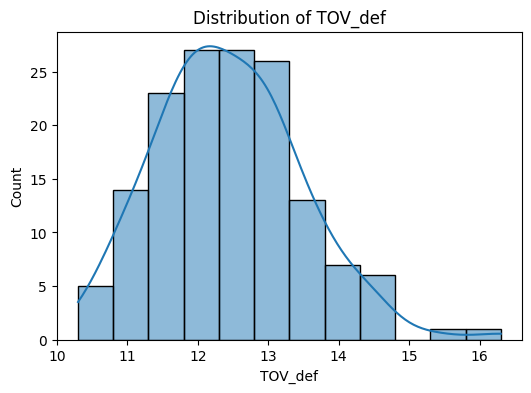

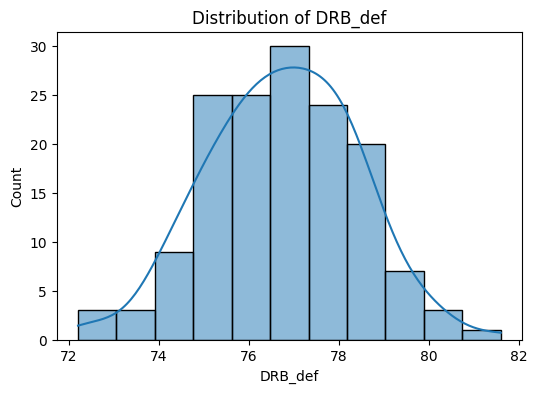

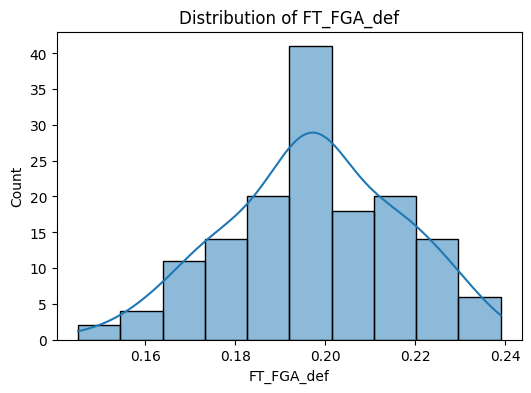

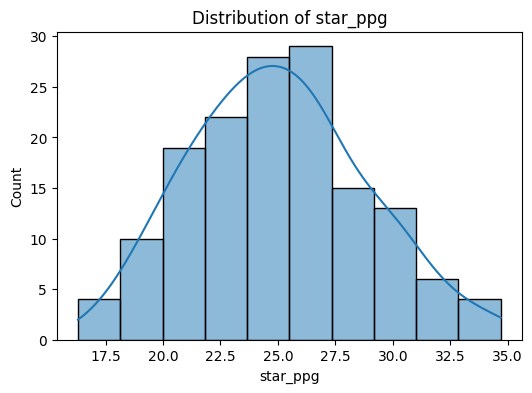

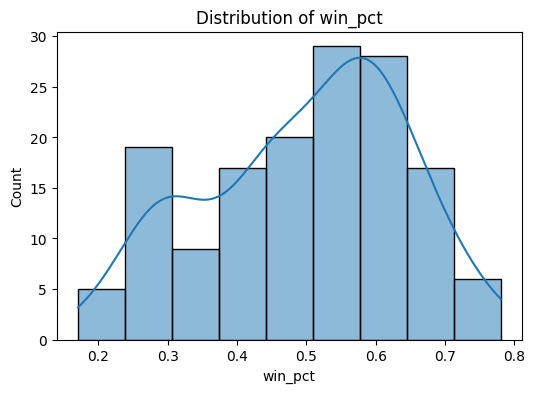

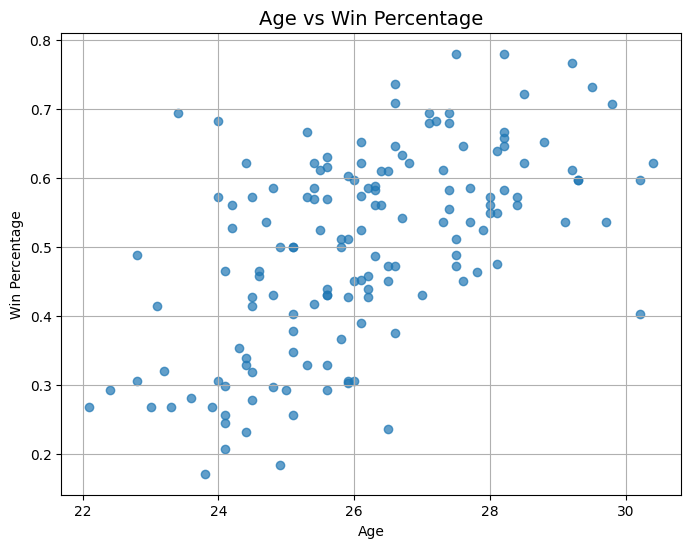

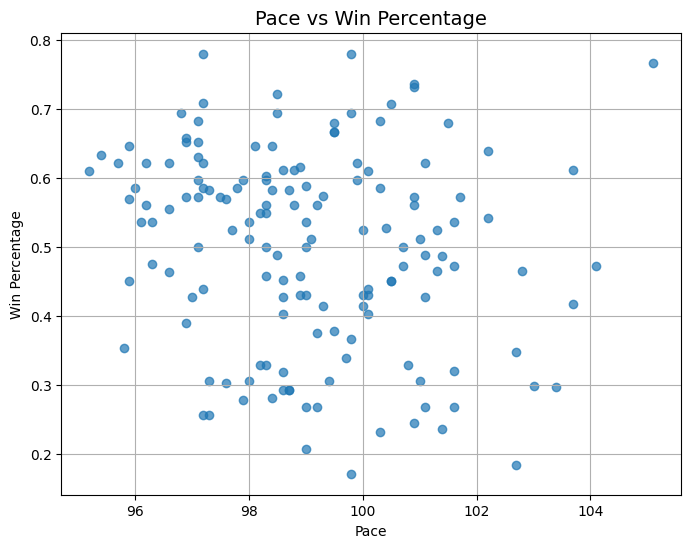

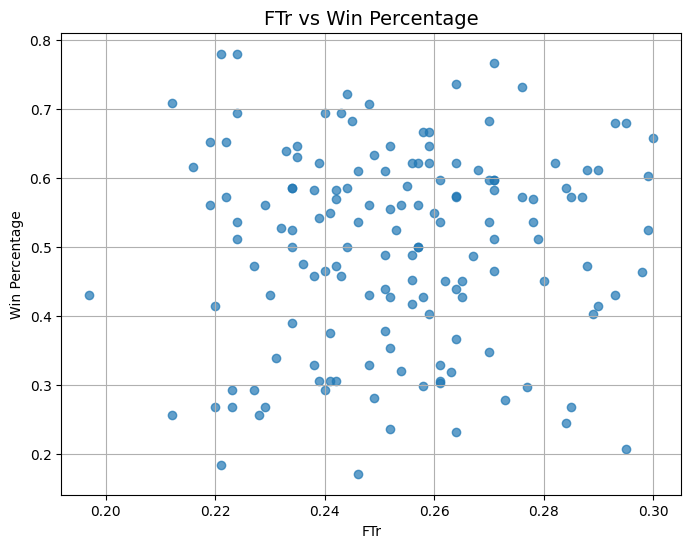

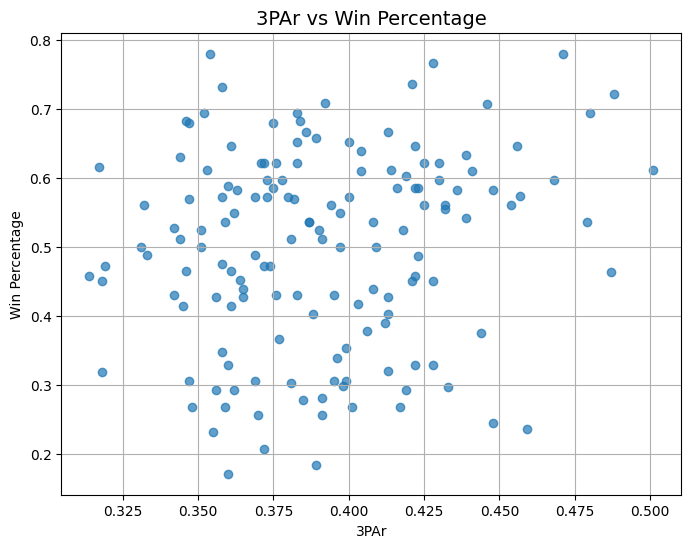

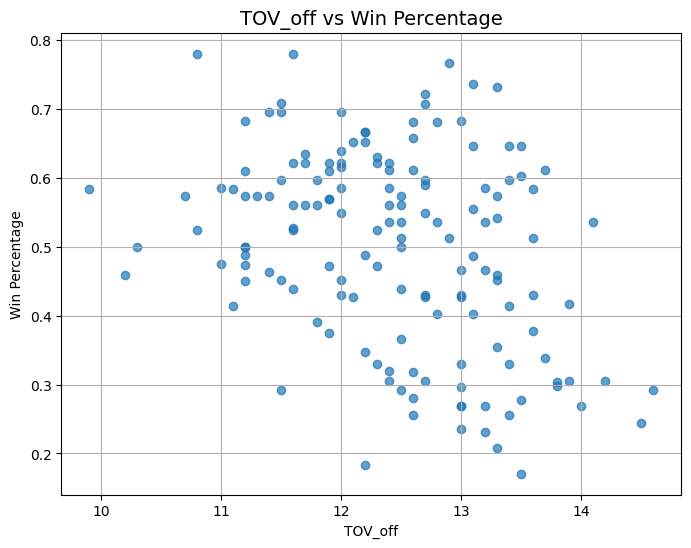

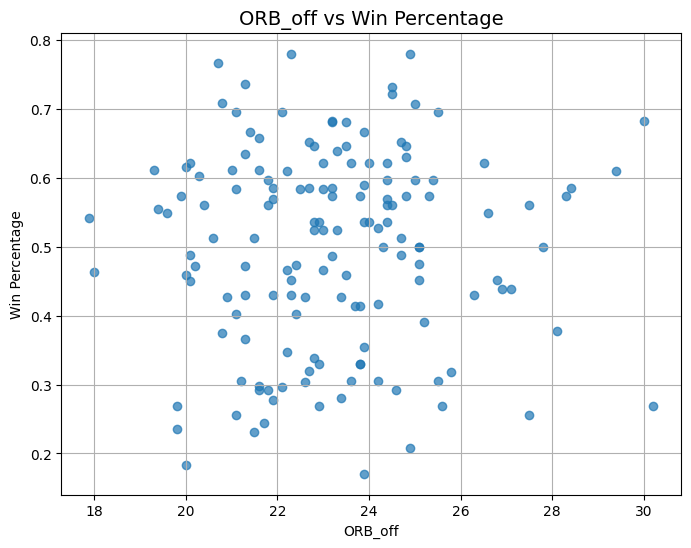

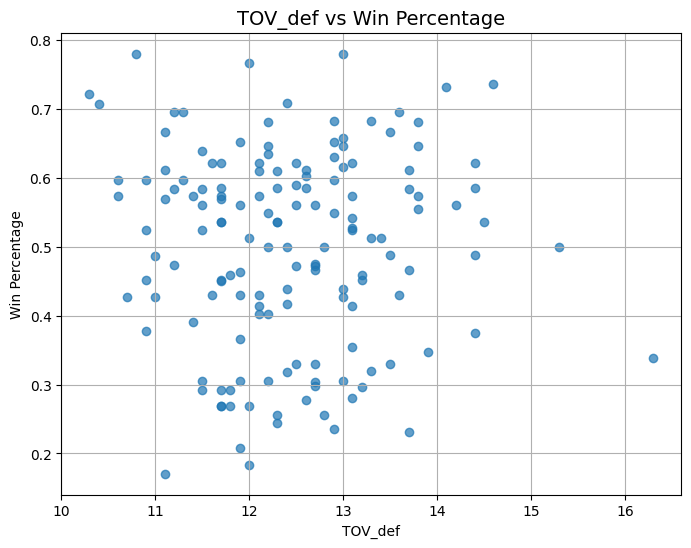

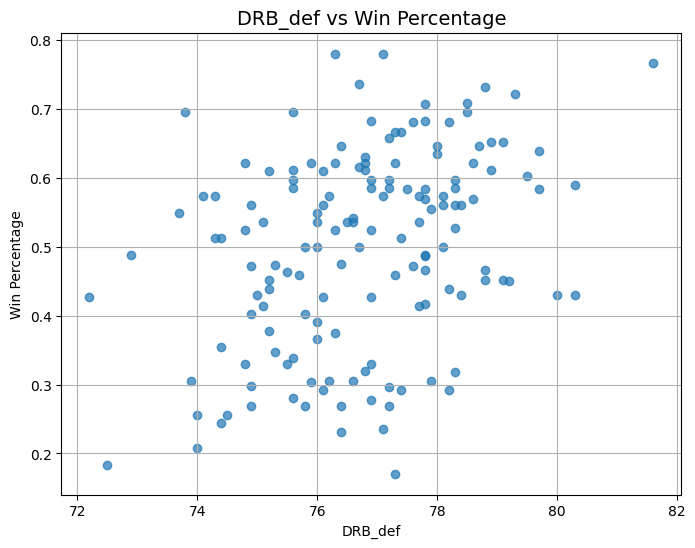

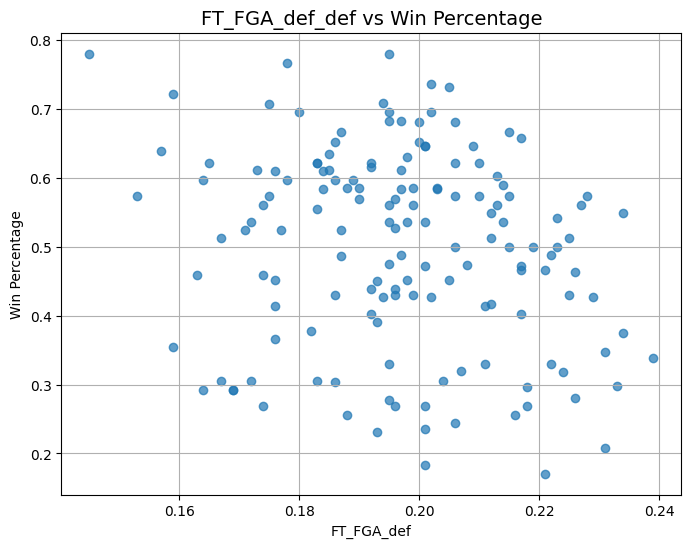

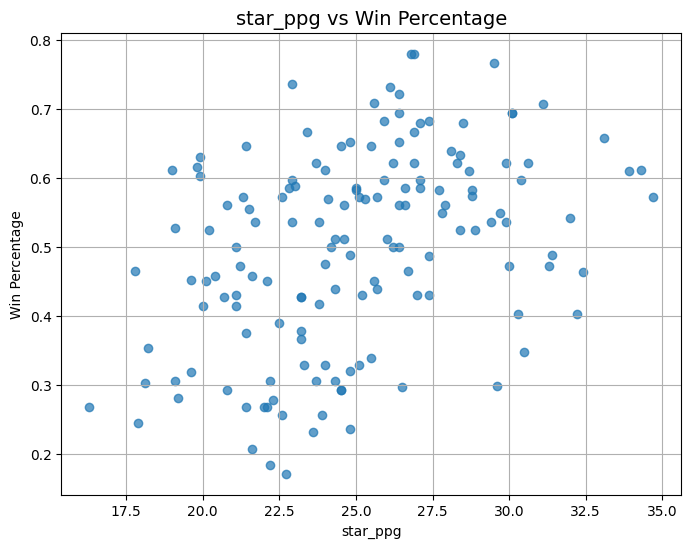

In [15]:
predictors = [
    'Age',        # Average team age: strategy could be to get younger or more experience
    'Pace',       # Offensive style: faster or slower tempo An estimate of possessions per 48 minutes
    'FTr',        # Offensive style: how often they draw fouls per FG attempt
    '3PAr',       # Offensive style: proportion of shots from 3-pt range
    'TOV_off',    # Offensive turnover percentage
    'ORB_off',    # Offensive rebound percentage
    'TOV_def',    # Defensive turnover percentage forced
    'DRB_def',    # Defensive rebound percentage
    'FT_FGA_def', # Opponent free throws per FG attempt
    'star_ppg'    # Star player proxy
]
target = 'win_pct'  # Predicting team win percentage
# Histograms
for col in predictors + [target]:
    if col in data.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(data[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()
        
# Scatterplot: Age vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['Age'], data['win_pct'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Win Percentage')
plt.title('Age vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: Pace vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['Pace'], data['win_pct'], alpha=0.7)
plt.xlabel('Pace')
plt.ylabel('Win Percentage')
plt.title('Pace vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: FTr vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['FTr'], data['win_pct'], alpha=0.7)
plt.xlabel('FTr')
plt.ylabel('Win Percentage')
plt.title('FTr vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: 3PAr vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['3PAr'], data['win_pct'], alpha=0.7)
plt.xlabel('3PAr')
plt.ylabel('Win Percentage')
plt.title('3PAr vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: TOV_off vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['TOV_off'], data['win_pct'], alpha=0.7)
plt.xlabel('TOV_off')
plt.ylabel('Win Percentage')
plt.title('TOV_off vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: ORB_off vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['ORB_off'], data['win_pct'], alpha=0.7)
plt.xlabel('ORB_off')
plt.ylabel('Win Percentage')
plt.title('ORB_off vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: TOV_def vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['TOV_def'], data['win_pct'], alpha=0.7)
plt.xlabel('TOV_def')
plt.ylabel('Win Percentage')
plt.title('TOV_def vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: DRB_def vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['DRB_def'], data['win_pct'], alpha=0.7)
plt.xlabel('DRB_def')
plt.ylabel('Win Percentage')
plt.title('DRB_def vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: FT_FGA_def vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['FT_FGA_def'], data['win_pct'], alpha=0.7)
plt.xlabel('FT_FGA_def')
plt.ylabel('Win Percentage')
plt.title('FT_FGA_def_def vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()

# Scatterplot: star_ppg vs Win Percentage
plt.figure(figsize=(8,6))
plt.scatter(data['star_ppg'], data['win_pct'], alpha=0.7)
plt.xlabel('star_ppg')
plt.ylabel('Win Percentage')
plt.title('star_ppg vs Win Percentage', fontsize=14)
plt.grid(True)
plt.show()



### Below is our representation of our final model: Elastic Net Regression, as well as some other metrics + how well it performed on test data


Selected alpha: 0.123285
Selected l1_ratio: 0.01

--- Model Performance ---
Train R2: 0.522
Test R2:  0.493
Train RMSE: 0.097
Test RMSE:  0.103

--- Selected Features and Coefficients ---
      Feature  Coefficient
0         Age     0.044810
7     DRB_def     0.032363
9    star_ppg     0.028372
6     TOV_def     0.023049
5     ORB_off     0.013730
3        3PAr     0.012149
2         FTr     0.007786
1        Pace    -0.006738
8  FT_FGA_def    -0.010461
4     TOV_off    -0.034052
Intercept: 0.507


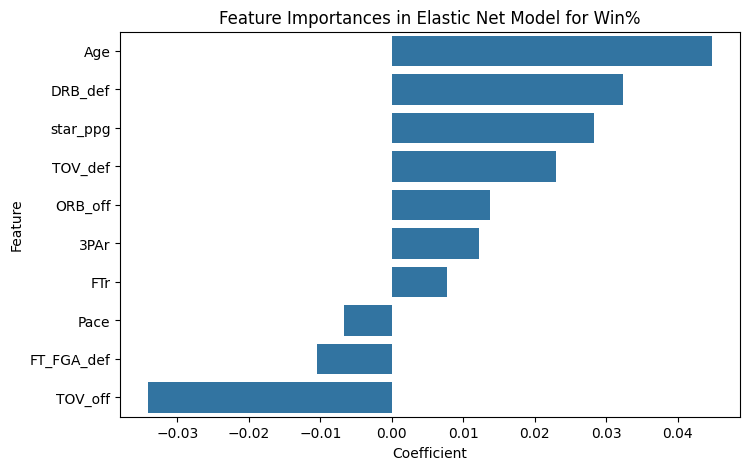

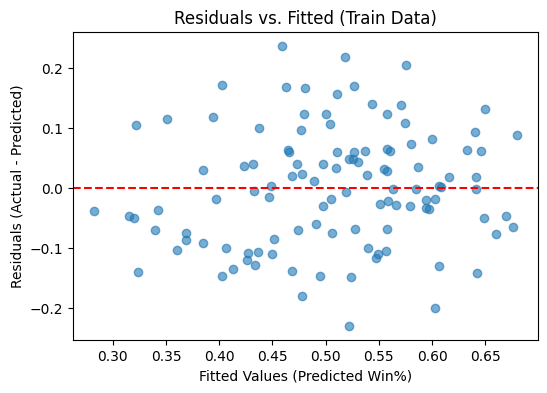

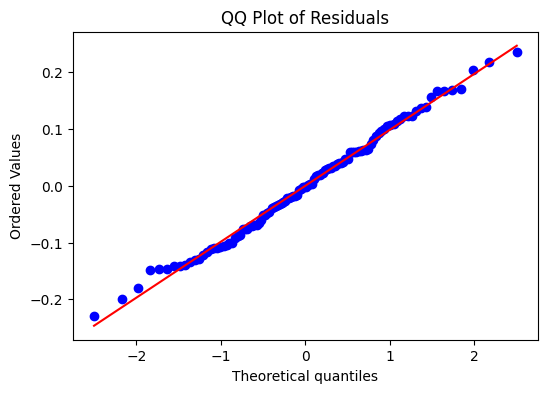

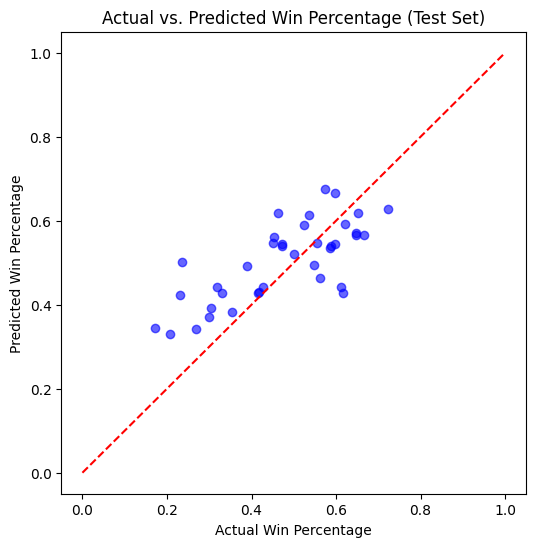

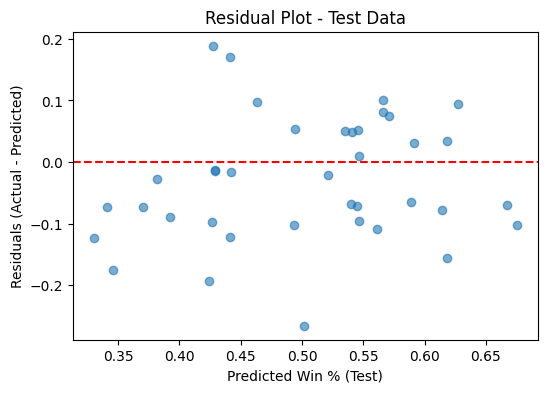


--- Retraining Model on Entire Historical Data ---

--- 2024-2025 Season Prediction Performance ---
R² Score: 0.526
RMSE: 0.110


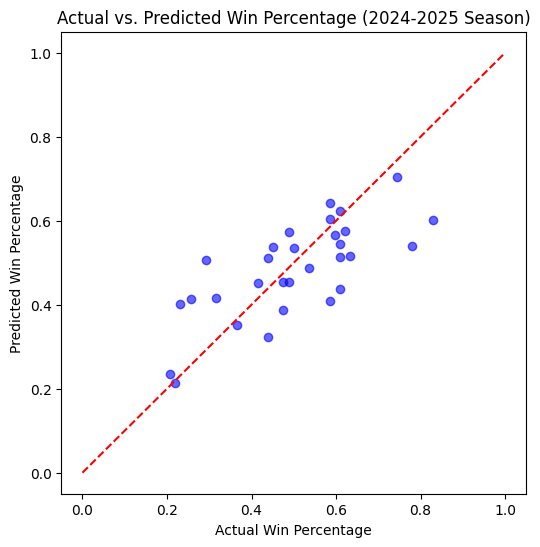

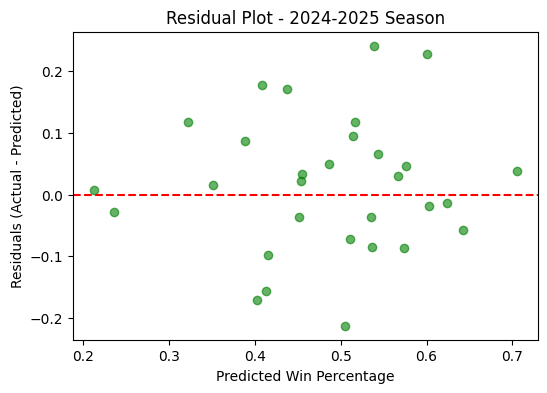


--- Team-by-Team Comparison (2024-2025) ---
                      Team  Actual Win%  Predicted Win%  Difference
2      Cleveland Cavaliers     0.780488        0.539127    0.241361
0    Oklahoma City Thunder     0.829268        0.600677    0.228591
5        Memphis Grizzlies     0.585366        0.408349    0.177017
11          Indiana Pacers     0.609756        0.437774    0.171982
6          Houston Rockets     0.634146        0.516976    0.117171
21  Portland Trail Blazers     0.439024        0.322164    0.116860
8           Denver Nuggets     0.609756        0.514182    0.095574
19           Chicago Bulls     0.475610        0.387966    0.087644
13      Los Angeles Lakers     0.609756        0.543736    0.066020
12         Detroit Pistons     0.536585        0.486740    0.049846
7          New York Knicks     0.621951        0.575982    0.045969
1           Boston Celtics     0.743902        0.705013    0.038889
17           Atlanta Hawks     0.487805        0.454891    0.032914
3  

In [16]:
###
### This is the smaller OLS regression model where efficiency stats like EFG and DRTG were removed so we could better see how things like 3-pointers and Free throws allowed could be used
### This model standardizes the features to the same scale 

# Define predictors and target
predictors = [
    'Age',        # Average team age: strategy could be to get younger or more experience
    'Pace',       # Offensive style: faster or slower tempo An estimate of possessions per 48 minutes
    'FTr',        # Offensive style: how often they draw fouls per FG attempt
    '3PAr',       # Offensive style: proportion of shots from 3-pt range
    'TOV_off',    # Offensive turnover percentage
    'ORB_off',    # Offensive rebound percentage
    'TOV_def',    # Defensive turnover percentage forced
    'DRB_def',    # Defensive rebound percentage
    'FT_FGA_def', # Opponent free throws per FG attempt
    'star_ppg'    # Star player proxy
]
target = 'win_pct'  # Predicting team win percentage

# TRAIN/TEST SPLIT
available_predictors = [p for p in predictors if p in data.columns]
X = data[available_predictors]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# MODEL BUILDING ELASTIC NET REGRESSION
model = ElasticNetCV(
    l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],  # Mix of L1 (Lasso) and L2 (Ridge)
    alphas=np.logspace(-6, 6, 100),                   # Range of regularization strengths
    cv=5,                                            # 5-fold cross-validation
    random_state=42
)
model.fit(X_train, y_train)

# Print selected parameters
print(f"\nSelected alpha: {model.alpha_:.6f}")
print(f"Selected l1_ratio: {model.l1_ratio_:.2f}")

# PREDICTIONS & EVALUATION
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
#train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
#test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_rmse = mean_squared_error(y_train, y_pred_train) ** 0.5
test_rmse = mean_squared_error(y_test, y_pred_test) ** 0.5


print("\n--- Model Performance ---")
print(f"Train R2: {train_r2:.3f}")
print(f"Test R2:  {test_r2:.3f}")
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test RMSE:  {test_rmse:.3f}")

# COEFFICIENTS & INTERPRETATION
coefficients = pd.DataFrame({
    'Feature': available_predictors,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Filter out features with zero coefficients (if any)
selected_features = coefficients[coefficients['Coefficient'] != 0]
print("\n--- Selected Features and Coefficients ---")
print(selected_features)
print(f"Intercept: {model.intercept_:.3f}")

# Bar plot of coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=selected_features)
plt.title("Feature Importances in Elastic Net Model for Win%")
plt.show()

# RESIDUAL DIAGNOSTICS
# Residuals vs. Fitted
residuals_train = y_train - y_pred_train
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predicted Win%)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Fitted (Train Data)")
plt.show()

# QQ Plot for Normality
plt.figure(figsize=(6, 4))
probplot(residuals_train, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

# VISUALIZE ACTUAL vs. PREDICTED ON TEST SET
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # 45-degree line
plt.xlabel("Actual Win Percentage")
plt.ylabel("Predicted Win Percentage")
plt.title("Actual vs. Predicted Win Percentage (Test Set)")
plt.show()

# Residual Plot for Test Set
residuals_test = y_test - y_pred_test
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_test, residuals_test, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Win % (Test)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Test Data")
plt.show()

##
## Retrain the model on the entire historical data before predicting on the new season
print("\n--- Retraining Model on Entire Historical Data ---")

# Standardize the entire historical data using the same scaler
X_scaled = scaler.transform(X)

# Retrain the Elastic Net model on the entire historical data
model.fit(X_scaled, y)

# Using the model to predict the most recent 2024-2025 Season
# Select the predictors from the new data
X_new = data_new[predictors]

# Standardize the new data using the same scaler fitted on the training data
X_new_scaled = scaler.transform(X_new)

# Predict using the retrained Elastic Net model
y_pred_new = model.predict(X_new_scaled)

# Extract actual win percentages from the new data
y_actual_new = data_new['win_pct']

# Evaluate the predictions
r2_new = r2_score(y_actual_new, y_pred_new)
#rmse_new = mean_squared_error(y_actual_new, y_pred_new, squared=False)
rmse_new = mean_squared_error(y_actual_new, y_pred_new)**.5

print("\n--- 2024-2025 Season Prediction Performance ---")
print(f"R² Score: {r2_new:.3f}")
print(f"RMSE: {rmse_new:.3f}")

# Visualize Actual vs. Predicted Win Percentages
plt.figure(figsize=(6, 6))
plt.scatter(y_actual_new, y_pred_new, alpha=0.6, color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # 45-degree reference line
plt.xlabel("Actual Win Percentage")
plt.ylabel("Predicted Win Percentage")
plt.title("Actual vs. Predicted Win Percentage (2024-2025 Season)")
plt.show()

# Residual Plot
residuals_new = y_actual_new - y_pred_new
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_new, residuals_new, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Win Percentage")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - 2024-2025 Season")
plt.show()

# Team-by-Team Comparison
results_df = pd.DataFrame({
    'Team': data_new['Team'],
    'Actual Win%': y_actual_new,
    'Predicted Win%': y_pred_new,
    'Difference': y_actual_new - y_pred_new
})
print("\n--- Team-by-Team Comparison (2024-2025) ---")
print(results_df.sort_values(by='Difference', ascending=False))


In [17]:
# Orders the dataframe by Actual Win%
print(results_df.sort_values(by='Actual Win%', ascending=False))

# Orders the dataframe by predicted win%
results_df = results_df[['Team', 'Predicted Win%', 'Actual Win%', 'Difference']]
print(results_df.sort_values(by='Predicted Win%', ascending=False))


                      Team  Actual Win%  Predicted Win%  Difference
0    Oklahoma City Thunder     0.829268        0.600677    0.228591
2      Cleveland Cavaliers     0.780488        0.539127    0.241361
1           Boston Celtics     0.743902        0.705013    0.038889
6          Houston Rockets     0.634146        0.516976    0.117171
7          New York Knicks     0.621951        0.575982    0.045969
4     Los Angeles Clippers     0.609756        0.623210   -0.013454
8           Denver Nuggets     0.609756        0.514182    0.095574
11          Indiana Pacers     0.609756        0.437774    0.171982
13      Los Angeles Lakers     0.609756        0.543736    0.066020
3   Minnesota Timberwolves     0.597561        0.567079    0.030482
5        Memphis Grizzlies     0.585366        0.408349    0.177017
9    Golden State Warriors     0.585366        0.642912   -0.057546
10         Milwaukee Bucks     0.585366        0.603312   -0.017946
12         Detroit Pistons     0.536585        0

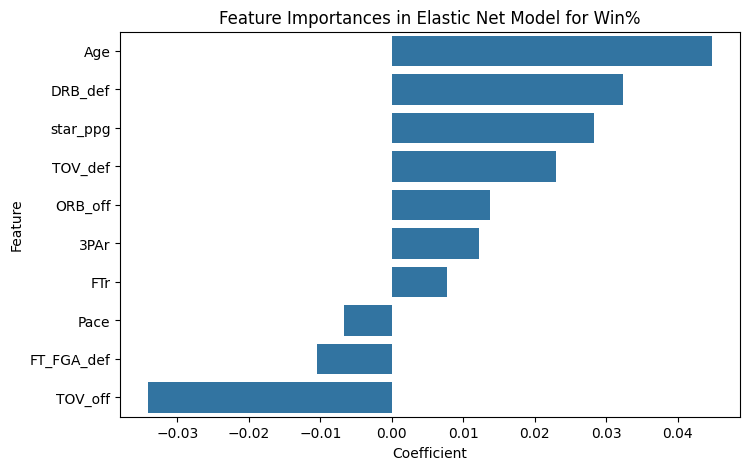

In [18]:
# Bar plot of coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=selected_features)
plt.title("Feature Importances in Elastic Net Model for Win%")
plt.show()

In [19]:
# Get the standard deviations 
std_devs = data[predictors].std()
print(std_devs)

# Calculate wins impact
for feature in selected_features['Feature']:
    coef = selected_features.loc[selected_features['Feature'] == feature, 'Coefficient'].values[0]
    wins_impact = coef * 82
    original_std = std_devs[feature]
    print(f"{feature}: {coef:.3f} coefficient = {wins_impact:.1f} wins per {original_std:.2f} change in {feature} (1 Standard Deviation)")

Age           1.758259
Pace          1.988750
FTr           0.021760
3PAr          0.038711
TOV_off       0.904733
ORB_off       2.290924
TOV_def       1.027306
DRB_def       1.655162
FT_FGA_def    0.019175
star_ppg      3.775331
dtype: float64
Age: 0.045 coefficient = 3.7 wins per 1.76 change in Age (1 Standard Deviation)
DRB_def: 0.032 coefficient = 2.7 wins per 1.66 change in DRB_def (1 Standard Deviation)
star_ppg: 0.028 coefficient = 2.3 wins per 3.78 change in star_ppg (1 Standard Deviation)
TOV_def: 0.023 coefficient = 1.9 wins per 1.03 change in TOV_def (1 Standard Deviation)
ORB_off: 0.014 coefficient = 1.1 wins per 2.29 change in ORB_off (1 Standard Deviation)
3PAr: 0.012 coefficient = 1.0 wins per 0.04 change in 3PAr (1 Standard Deviation)
FTr: 0.008 coefficient = 0.6 wins per 0.02 change in FTr (1 Standard Deviation)
Pace: -0.007 coefficient = -0.6 wins per 1.99 change in Pace (1 Standard Deviation)
FT_FGA_def: -0.010 coefficient = -0.9 wins per 0.02 change in FT_FGA_def (1